## import required libraries

In [1]:
import pandas as pd

## read csv file using pandas

In [2]:
df=pd.read_csv("C:\\Users\\shrut\\OneDrive\\Desktop\\P_JN\\csv_files\\laptop_prices.csv")

In [3]:
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


## get all columns from dataframe

In [4]:
for col in df.columns:
    print(col)

Brand
Processor
RAM (GB)
Storage
GPU
Screen Size (inch)
Resolution
Battery Life (hours)
Weight (kg)
Operating System
Price ($)


## print information about dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


## check wheather null value is present or not

In [6]:
df.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

## plot bar graph based on laptop brand name

<Axes: xlabel='Brand'>

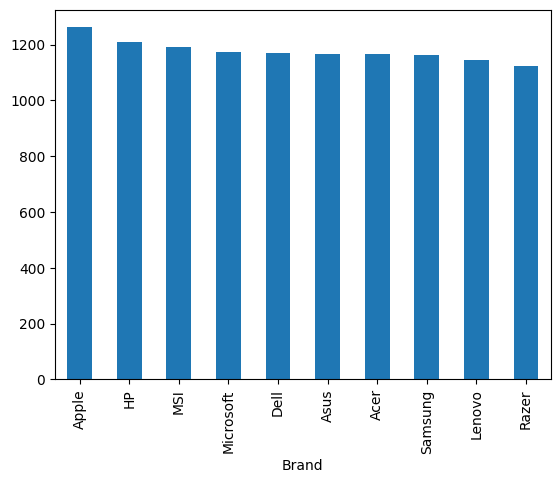

In [7]:
df['Brand'].value_counts().plot(kind='bar')

## What are the top 5 brands with the highest average price?


In [8]:
brand_avg_price=df.groupby('Brand')['Price ($)'].mean()

In [9]:
top_5=brand_avg_price.sort_values(ascending=False).head()

In [10]:
top_5

Brand
Apple        2915.364279
Razer        2695.213804
MSI          2517.552227
Lenovo       1978.465790
Microsoft    1975.203549
Name: Price ($), dtype: float64

## How does RAM size affect the price? Is there a noticeable trend?


In [11]:
ram_effect=df[['RAM (GB)','Price ($)']].corr()

## visual representation 

In [12]:
import seaborn as sns

<Axes: >

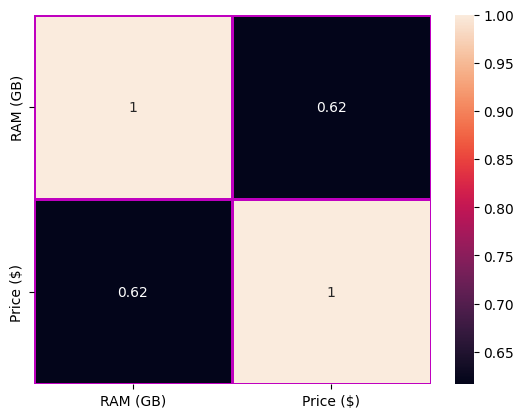

In [13]:
sns.heatmap(ram_effect,annot=True,linecolor='m',linewidth=0.8)

## Which processor is most commonly used in the dataset?


In [14]:
df['Processor'].mode()

0    Intel i3
Name: Processor, dtype: object

In [15]:
df['Processor'].value_counts()

Processor
Intel i3       1570
Intel i7       1509
AMD Ryzen 3    1500
AMD Ryzen 9    1472
Intel i9       1456
Intel i5       1429
AMD Ryzen 5    1422
AMD Ryzen 7    1410
Name: count, dtype: int64

## Is there a correlation between battery life and weight?


In [16]:
bat_weig=df[['Battery Life (hours)','Weight (kg)']].corr()

<Axes: >

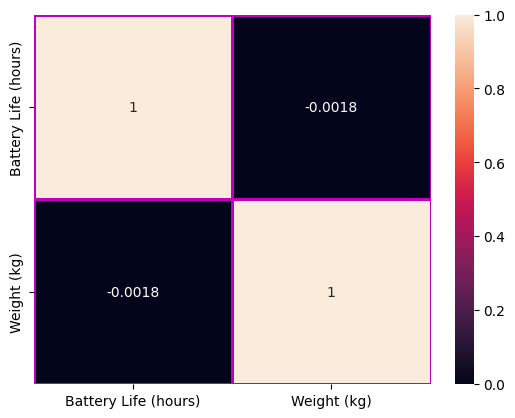

In [17]:
sns.heatmap(bat_weig,annot=True,linecolor='m',linewidth=0.9)

#### visual represntation of relation between Battery life and weight

<Axes: xlabel='Battery Life (hours)', ylabel='Weight (kg)'>

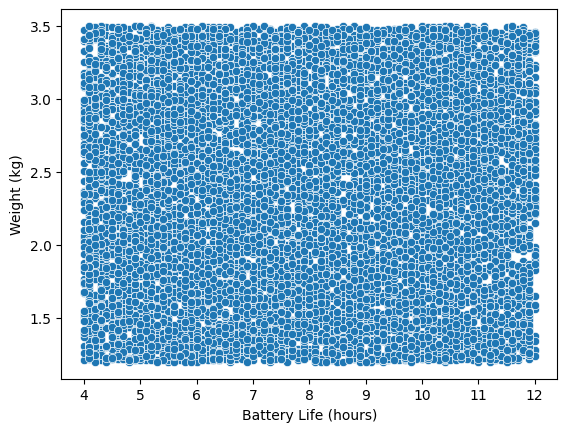

In [18]:
sns.scatterplot(x='Battery Life (hours)',y='Weight (kg)',data=df)

## How does screen size impact battery life?


In [19]:
scr_bat=df[['Screen Size (inch)','Battery Life (hours)']].corr()

<Axes: >

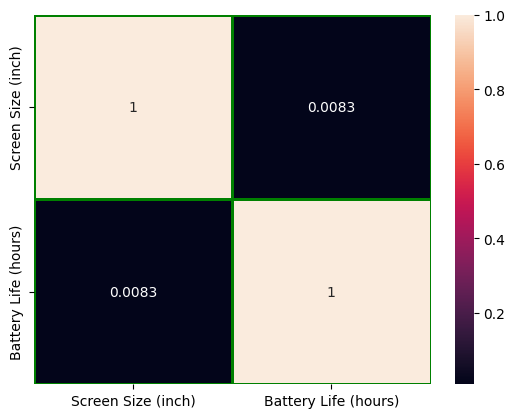

In [20]:
sns.heatmap(scr_bat,annot=True,linewidth=0.9,linecolor='g')

## What is the average price difference between HDD and SSD storage?

In [74]:
SSD_mean=df[df['Storage'].str.contains('SSD')]
SSD_mean.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),INR
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,346665.88
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,117586.80
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,231835.36
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,65148.97
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,178649.06


In [75]:
SSD=SSD_mean['Price ($)'].mean().round(2)
print(SSD)

2250.25


In [76]:
HDD_mean=df[df['Storage'].str.contains('HDD')]
HDD_mean

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),INR
11,Razer,Intel i5,32,1TB HDD,AMD Radeon RX 6800,16.0,1920x1080,8.3,1.21,Windows,2032.69,176295.20
22,Dell,AMD Ryzen 3,8,1TB HDD,Nvidia GTX 1650,13.3,2560x1440,7.0,1.70,Linux,878.50,76192.31
23,Dell,Intel i5,8,1TB HDD,Integrated,13.3,2560x1440,11.9,2.53,macOS,830.62,72039.67
56,Asus,AMD Ryzen 9,8,1TB HDD,AMD Radeon RX 6800,13.3,2560x1440,8.2,2.15,FreeDOS,1866.80,161907.56
63,Asus,AMD Ryzen 7,8,1TB HDD,Nvidia RTX 3080,16.0,1920x1080,7.8,1.67,macOS,1267.84,109959.76
...,...,...,...,...,...,...,...,...,...,...,...,...
11740,Dell,Intel i3,8,1TB HDD,Nvidia RTX 2060,16.0,1920x1080,7.3,2.71,Windows,666.34,57791.67
11743,Acer,AMD Ryzen 9,4,1TB HDD,Nvidia RTX 2060,13.3,2560x1440,4.4,2.71,Linux,1509.43,130912.86
11747,Acer,AMD Ryzen 9,64,1TB HDD,Integrated,14.0,3840x2160,5.8,1.76,macOS,3782.95,328095.25
11756,Lenovo,AMD Ryzen 3,32,1TB HDD,Nvidia RTX 3080,15.6,2560x1440,4.3,3.34,Linux,1515.35,131426.31


In [77]:
HDD=HDD_mean['Price ($)'].mean().round(2)

In [78]:
print(HDD)

1909.37


### price difference between HDD and SSD

In [79]:
difference=SSD-HDD

In [80]:
print(difference.round(2))

340.88


## Which GPU brand appears most frequently?


In [28]:
df['GPU'].value_counts()

GPU
Nvidia RTX 2060       1746
Nvidia GTX 1650       1698
Nvidia RTX 3060       1679
AMD Radeon RX 6600    1676
AMD Radeon RX 6800    1669
Integrated            1653
Nvidia RTX 3080       1647
Name: count, dtype: int64

In [29]:
# ------------------------------------or-------------------------------------

In [30]:
df['GPU'].mode()

0    Nvidia RTX 2060
Name: GPU, dtype: object

## How do different operating systems compare in terms of average price?


In [31]:
df.groupby('Operating System')['Price ($)'].mean()

Operating System
FreeDOS    2189.949800
Linux      2178.742634
Windows    2181.014753
macOS      2184.583501
Name: Price ($), dtype: float64

## Can you provide insights into the distribution of laptop weights?


In [32]:
df['Weight (kg)'].value_counts()

Weight (kg)
3.40    74
2.55    72
1.85    72
3.43    69
1.67    68
        ..
2.17    37
2.18    34
1.20    27
3.00    25
3.50    24
Name: count, Length: 231, dtype: int64

## Are there any specific brands that dominate the high-end price range?

<Axes: xlabel='Brand', ylabel='Price ($)'>

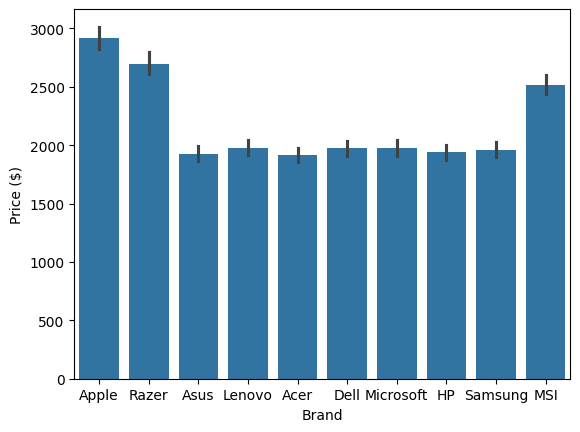

In [33]:
sns.barplot(x='Brand',y='Price ($)',data=df)

## available  storage options

<Axes: xlabel='count', ylabel='Storage'>

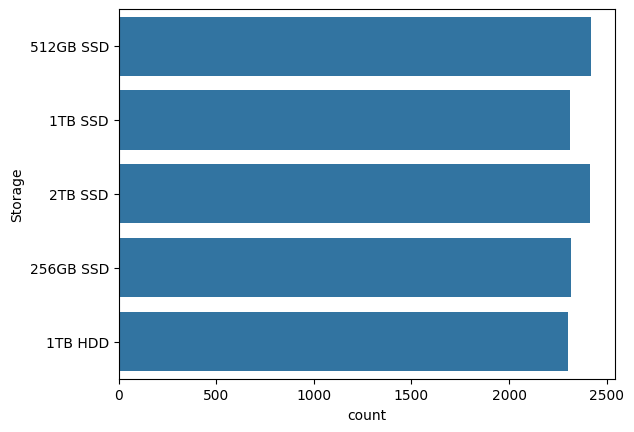

In [34]:
sns.countplot(df['Storage'])

<Axes: xlabel='Storage', ylabel='Count'>

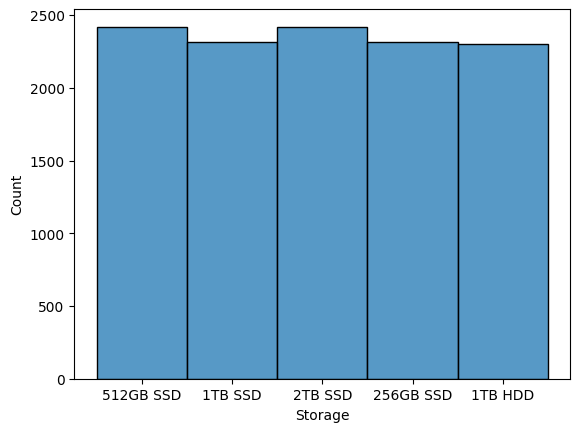

In [35]:
sns.histplot(x='Storage',data=df,bins=20)

## count of processor

<Axes: xlabel='Processor'>

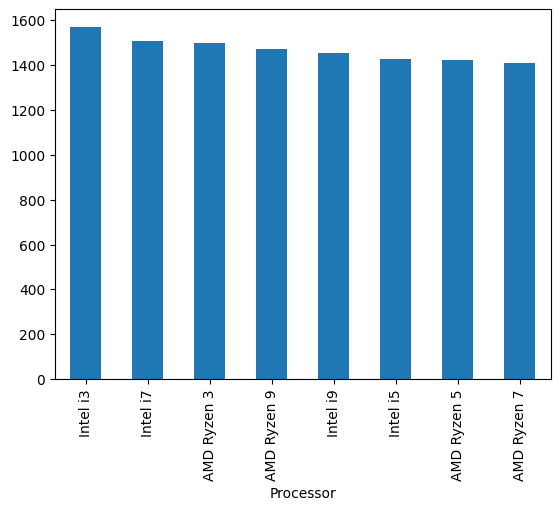

In [36]:
df['Processor'].value_counts().plot(kind='bar')

In [37]:
df['INR']=(df['Price ($)']*86.73).round(2)

## 64 GB RAM ,1TB storage and intel i9 processor 

In [38]:
best=df[(df['RAM (GB)']==64)&(df['Storage']=='1TB SSD')&(df['Processor']=='Intel i9')&(df['Screen Size (inch)']==17.3)]

In [39]:
best.sort_values(by=['INR'])

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),INR
6386,Dell,Intel i9,64,1TB SSD,Nvidia RTX 3080,17.3,1366x768,5.1,2.57,Linux,3608.14,312933.98
7211,Samsung,Intel i9,64,1TB SSD,Integrated,17.3,2560x1440,8.9,1.20,Windows,3704.72,321310.37
7129,Microsoft,Intel i9,64,1TB SSD,Integrated,17.3,2560x1440,10.5,1.38,FreeDOS,3707.39,321541.93
6958,Asus,Intel i9,64,1TB SSD,Nvidia RTX 3080,17.3,1366x768,7.1,1.46,macOS,3717.81,322445.66
11526,Microsoft,Intel i9,64,1TB SSD,AMD Radeon RX 6600,17.3,1920x1080,7.5,1.65,FreeDOS,4290.14,372083.84
3611,Acer,Intel i9,64,1TB SSD,Nvidia RTX 3080,17.3,1920x1080,8.5,2.55,Windows,4306.51,373503.61
8253,HP,Intel i9,64,1TB SSD,Integrated,17.3,3840x2160,7.0,3.08,Linux,4879.98,423240.67
7195,HP,Intel i9,64,1TB SSD,AMD Radeon RX 6800,17.3,2560x1440,10.2,2.84,Windows,5342.79,463380.18
6094,Apple,Intel i9,64,1TB SSD,Integrated,17.3,2560x1440,7.4,3.43,FreeDOS,5395.18,467923.96
1309,MSI,Intel i9,64,1TB SSD,Nvidia RTX 3060,17.3,2560x1440,10.7,2.34,FreeDOS,7107.37,616422.20


## df dataframe

In [40]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),INR
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,346665.88
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,117586.80
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,231835.36
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,65148.97
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,178649.06


## Apple laptop with Intel i9 processor 

In [41]:
df[(df['Brand']=='Apple')&( df['Processor']=='Intel i9' )]

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),INR
24,Apple,Intel i9,64,256GB SSD,Integrated,17.3,1920x1080,6.9,2.55,Windows,4428.68,384099.42
43,Apple,Intel i9,32,2TB SSD,Nvidia GTX 1650,17.3,2560x1440,5.7,1.83,Windows,5373.59,466051.46
92,Apple,Intel i9,16,1TB HDD,AMD Radeon RX 6800,16.0,2560x1440,9.4,2.65,FreeDOS,3428.94,297391.97
273,Apple,Intel i9,8,512GB SSD,Nvidia RTX 3060,16.0,2560x1440,6.7,2.51,macOS,3290.11,285351.24
507,Apple,Intel i9,64,256GB SSD,Nvidia GTX 1650,15.6,2560x1440,7.1,1.49,Windows,7966.98,690976.18
...,...,...,...,...,...,...,...,...,...,...,...,...
11169,Apple,Intel i9,64,1TB HDD,Nvidia GTX 1650,17.3,2560x1440,6.1,2.61,macOS,6873.51,596139.52
11332,Apple,Intel i9,16,512GB SSD,Nvidia GTX 1650,17.3,1366x768,5.6,2.37,Windows,2705.31,234631.54
11379,Apple,Intel i9,32,1TB SSD,Nvidia RTX 3080,16.0,1366x768,9.0,3.23,Linux,3510.91,304501.22
11415,Apple,Intel i9,4,256GB SSD,AMD Radeon RX 6600,15.6,2560x1440,10.5,1.96,Linux,3072.98,266519.56


## What is the price distribution across different RAM sizes?



In [54]:
import matplotlib.pyplot as plt

<Figure size 2000x500 with 0 Axes>

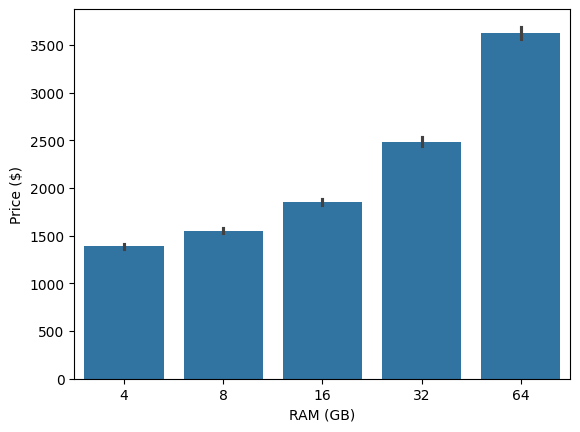

<Figure size 2000x500 with 0 Axes>

In [58]:
sns.barplot(x='RAM (GB)',y='Price ($)',data=df)
plt.figure(figsize=(20, 5))

## How does the combination of CPU and GPU affect the price?


In [65]:
cpu_gpu_pivot = df.pivot_table(index='Processor', columns='GPU', values='Price ($)', aggfunc='mean')

cpu_gpu_pivot


GPU,AMD Radeon RX 6600,AMD Radeon RX 6800,Integrated,Nvidia GTX 1650,Nvidia RTX 2060,Nvidia RTX 3060,Nvidia RTX 3080
Processor,,,,,,,
AMD Ryzen 3,1663.212121,1637.577018,1015.795349,1618.380226,1588.139532,1594.105360,1638.268848
AMD Ryzen 5,1981.647846,2006.433731,1228.621649,1985.913592,1883.834645,1930.389220,1988.333716
AMD Ryzen 7,2324.701408,2302.427569,1661.084807,2466.032300,2373.063731,2374.070303,2372.390000
AMD Ryzen 9,3157.473493,3360.026411,2159.713262,3202.098507,3164.723836,3207.926980,3113.366934
Intel i3,1692.604146,1548.428263,1077.154083,1671.863188,1602.026432,1694.541204,1646.569204
Intel i5,1988.641207,1990.683515,1286.483767,1848.811313,1881.620486,2021.655415,1819.828967
Intel i7,2357.086303,2388.945980,1692.139193,2438.442100,2499.649060,2451.757550,2297.208624
Intel i9,3080.745050,3320.599434,2089.164474,3181.624929,3225.538357,3400.116797,3168.563951
